In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests as req
import time
import csv
%matplotlib inline

In [2]:
ISS_loc = []
count = 0
while count <=120:
    response = req.get("http://api.open-notify.org/iss-now.json")
    status = response.status_code
    if status != 200:
        print(f'Error improper response code. Code is {status}')
        break
    else:
        resp = response.json()
        ISS_loc.append(resp)
        time.sleep(10)
        count = count + 1

In [5]:
ISS_loc[:5]

[{'iss_position': {'latitude': '-42.0581', 'longitude': '-13.7820'},
  'timestamp': 1658068485,
  'message': 'success'},
 {'iss_position': {'latitude': '-41.6833', 'longitude': '-13.0664'},
  'timestamp': 1658068496,
  'message': 'success'},
 {'iss_position': {'latitude': '-41.3034', 'longitude': '-12.3596'},
  'timestamp': 1658068506,
  'message': 'success'},
 {'iss_position': {'latitude': '-40.9188', 'longitude': '-11.6615'},
  'timestamp': 1658068517,
  'message': 'success'},
 {'iss_position': {'latitude': '-40.5295', 'longitude': '-10.9721'},
  'timestamp': 1658068527,
  'message': 'success'}]

In [48]:
ISS_dict={'latitude': None, 'longitude': None, 'timestamp': None}
lat_list = []
long_list = []
time_list = []

for i in range(0,len(ISS_loc)):
    lat_list.append(ISS_loc[i]['iss_position']['latitude'])
    long_list.append(ISS_loc[i]['iss_position']['longitude'])
    time_list.append(ISS_loc[i]['timestamp'])

ISS_dict['latitude'] = lat_list
ISS_dict['longitude'] = long_list
ISS_dict['timestamp'] = time_list

ISS_df = pd.DataFrame.from_dict(ISS_dict)

In [49]:
ISS_df.head()

,latitude,longitude,timestamp
0,-42.0581,-13.7820,1658068485
1,-41.6833,-13.0664,1658068496
2,-41.3034,-12.3596,1658068506
3,-40.9188,-11.6615,1658068517
4,-40.5295,-10.9721,1658068527


In [51]:
ISS_df['latitude'] = ISS_df['latitude'].astype(float)
ISS_df['longitude'] = ISS_df['longitude'].astype(float)
ISS_df['timestamp'] = ISS_df['timestamp'].astype(float)
ISS_df['coordinates'] = ISS_df[['longitude', 'latitude']].values.tolist()

In [12]:
ISS_df.head()

,latitude,longitude,timestamp,coordinates
0,-42.0581,-13.7820,1.658068e+09,"[-13.782, -42.0581]"
1,-41.6833,-13.0664,1.658068e+09,"[-13.0664, -41.6833]"
2,-41.3034,-12.3596,1.658069e+09,"[-12.3596, -41.3034]"
3,-40.9188,-11.6615,1.658069e+09,"[-11.6615, -40.9188]"
4,-40.5295,-10.9721,1.658069e+09,"[-10.9721, -40.5295]"


In [52]:
print(type(ISS_df))

<class 'pandas.core.frame.DataFrame'>


In [53]:
ISS_df.to_csv('ISS_df')

In [54]:
filename="ISS_df.csv"

In [55]:
df=pd.read_csv("ISS_df")

In [56]:
df.head()

,Unnamed: 0,latitude,longitude,timestamp,coordinates
0,0,-42.0581,-13.7820,1.658068e+09,"[-13.782, -42.0581]"
1,1,-41.6833,-13.0664,1.658068e+09,"[-13.0664, -41.6833]"
2,2,-41.3034,-12.3596,1.658069e+09,"[-12.3596, -41.3034]"
3,3,-40.9188,-11.6615,1.658069e+09,"[-11.6615, -40.9188]"
4,4,-40.5295,-10.9721,1.658069e+09,"[-10.9721, -40.5295]"


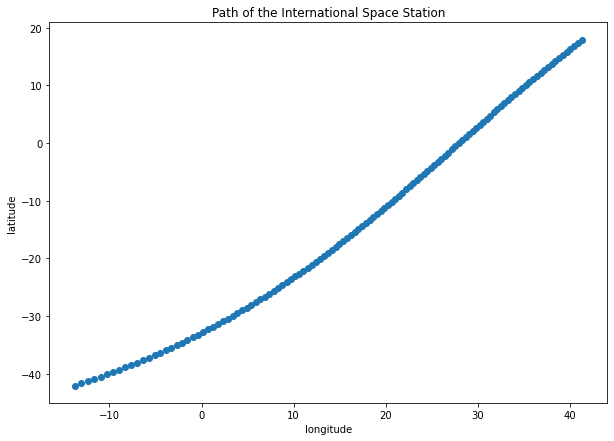

In [57]:
reader = csv.reader('ISS_df')

fig, axes = plt.subplots(figsize=(10,7))
axes.set_xlabel('longitude')
axes.set_ylabel('latitude')
axes.set_title('Path of the International Space Station')

columns = ["longitude", "latitude"]
iss_df = pd.read_csv("ISS_df", usecols=columns)
plt.scatter(iss_df.longitude, iss_df.latitude)
plt.show()
